<a href="https://colab.research.google.com/github/Rohan-69108/BLINK-IT-SALE-REVENEU/blob/main/revenue_prediction(blink_it).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/Data set/weekly_features.csv")
# Sort by time to preserve chronological order
df = df.sort_values(by=["year", "week"]).reset_index(drop=True)

# Drop identifier columns from features
feature_cols = df.drop(columns=["weekly_revenue", "year", "week"]).columns

# ----------- Model 1: Same Week Features to Predict Same Week Revenue -----------

X1 = df[feature_cols]
y1 = df["weekly_revenue"]

# Standardize features
scaler1 = StandardScaler()
X1_scaled = scaler1.fit_transform(X1)

# Train-test split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1_scaled, y1, test_size=0.2, random_state=42)

# Linear Regression model
model1 = LinearRegression()
model1.fit(X1_train, y1_train)

# Predict and evaluate
y1_pred = model1.predict(X1_test)
print("🔹 Model 1: Current Week Features → Revenue")
print("MSE:", mean_squared_error(y1_test, y1_pred))
print("R² Score:", r2_score(y1_test, y1_pred))

# ----------- Model 2: Lagged Features to Predict Current Week Revenue -----------

df_lagged = df.copy()
df_lagged[feature_cols] = df_lagged[feature_cols].shift(1)

# Drop first row (no prior week data)
df_lagged = df_lagged.dropna().reset_index(drop=True)

X2 = df_lagged[feature_cols]
y2 = df_lagged["weekly_revenue"]

# Standardize features
scaler2 = StandardScaler()
X2_scaled = scaler2.fit_transform(X2)

# Train-test split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2_scaled, y2, test_size=0.2, random_state=42)

# Linear Regression model
model2 = LinearRegression()
model2.fit(X2_train, y2_train)

# Predict and evaluate
y2_pred = model2.predict(X2_test)
print("\n🔹 Model 2: Previous Week Features → Revenue")
print("MSE:", mean_squared_error(y2_test, y2_pred))
print("R² Score:", r2_score(y2_test, y2_pred))


🔹 Model 1: Current Week Features → Revenue
MSE: 57782808.61920805
R² Score: 0.8594537204958755

🔹 Model 2: Previous Week Features → Revenue
MSE: 648410886.0353408
R² Score: -0.6208643117539985


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df.head(7)

,year,week,weekly_revenue,order_count,upi_share,cash_payment_ratio,avg_order_value,retention_rate,avg_delivery_delay,on_time_delivery_rate,avg_stock_received,avg_damaged_stock,unique_products_stocked
0,2023,11,60674.33,29,0.172414,0.206897,2092.218276,0.000000,2.0,0.413793,2.000000,1.021739,221
1,2023,12,121729.40,52,0.173077,0.269231,2340.950000,0.068966,4.0,0.365385,1.820912,1.105673,266
2,2023,13,124700.57,54,0.203704,0.314815,2309.269815,0.000000,2.0,0.407407,1.873884,1.046875,264
3,2023,14,144800.38,60,0.250000,0.266667,2413.339667,0.000000,1.5,0.466667,2.068508,0.983425,265
4,2023,15,130769.15,63,0.174603,0.333333,2075.700794,0.016667,2.0,0.396825,1.968254,1.037037,267
5,2023,16,111417.47,46,0.195652,0.304348,2422.118913,0.000000,3.5,0.282609,1.937571,1.017026,264
6,2023,17,133132.43,54,0.185185,0.277778,2465.415370,0.043478,3.0,0.314815,1.994407,0.982103,265


In [ ]:
df.tail(5)

,year,week,weekly_revenue,order_count,upi_share,cash_payment_ratio,avg_order_value,retention_rate,avg_delivery_delay,on_time_delivery_rate,avg_stock_received,avg_damaged_stock,unique_products_stocked
82,2024,41,119416.65,52,0.346154,0.173077,2296.474038,0.000000,3.5,0.384615,1.941309,1.108352,263
83,2024,42,117775.54,55,0.309091,0.181818,2141.373455,0.019231,2.0,0.400000,1.983778,1.093859,264
84,2024,43,139059.22,63,0.206349,0.174603,2207.289206,0.000000,3.0,0.349206,1.934195,1.099882,260
85,2024,44,132307.79,62,0.161290,0.338710,2133.996613,0.000000,4.0,0.306452,1.904545,1.045455,264
86,2024,45,13820.12,4,0.500000,0.250000,3455.030000,0.000000,4.0,0.000000,1.855932,1.211864,186


In [ ]:
df.columns

Index(['year', 'week', 'weekly_revenue', 'order_count', 'upi_share',
       'cash_payment_ratio', 'avg_order_value', 'retention_rate',
       'avg_delivery_delay', 'on_time_delivery_rate', 'avg_stock_received',
       'avg_damaged_stock', 'unique_products_stocked'],
      dtype='object')

Regression summary

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Load and sort data
df = pd.read_csv("/content/drive/MyDrive/Data set/weekly_features.csv")
df = df.sort_values(by=["year", "week"]).reset_index(drop=True)

# Define features and target
feature_cols = df.drop(columns=["weekly_revenue", "year", "week"]).columns
# ------------------- MODEL 1: Current Week ------------------- #
X1 = df[feature_cols]
y1 = df["weekly_revenue"]

# Add constant for intercept
X1_const = sm.add_constant(X1)

# Fit model
model1 = sm.OLS(y1, X1_const).fit()
print("🔹 Model 1: Current Week Features → Revenue")
print(model1.summary())

# ------------------- MODEL 2: Previous Week ------------------- #
df_lagged = df.copy()
df_lagged[feature_cols] = df_lagged[feature_cols].shift(1)
df_lagged = df_lagged.dropna().reset_index(drop=True)

X2 = df_lagged[feature_cols]
y2 = df_lagged["weekly_revenue"]

X2_const = sm.add_constant(X2)
model2 = sm.OLS(y2, X2_const).fit()

print("\n🔹 Model 2: Previous Week Features → Revenue")
print(model2.summary())


🔹 Model 1: Current Week Features → Revenue
                            OLS Regression Results                            
Dep. Variable:         weekly_revenue   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     466.6
Date:                Mon, 02 Jun 2025   Prob (F-statistic):           6.42e-64
Time:                        06:25:48   Log-Likelihood:                -823.03
No. Observations:                  87   AIC:                             1668.
Df Residuals:                      76   BIC:                             1695.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

In [ ]:
df.head(5)

,year,week,weekly_revenue,order_count,upi_share,cash_payment_ratio,avg_order_value,retention_rate,avg_delivery_delay,on_time_delivery_rate,avg_stock_received,avg_damaged_stock,unique_products_stocked
0,2023,11,60674.33,29,0.172414,0.206897,2092.218276,0.000000,2.0,0.413793,2.000000,1.021739,221
1,2023,12,121729.40,52,0.173077,0.269231,2340.950000,0.068966,4.0,0.365385,1.820912,1.105673,266
2,2023,13,124700.57,54,0.203704,0.314815,2309.269815,0.000000,2.0,0.407407,1.873884,1.046875,264
3,2023,14,144800.38,60,0.250000,0.266667,2413.339667,0.000000,1.5,0.466667,2.068508,0.983425,265
4,2023,15,130769.15,63,0.174603,0.333333,2075.700794,0.016667,2.0,0.396825,1.968254,1.037037,267


In [ ]:
X1.head(5)

,order_count,upi_share,cash_payment_ratio,avg_order_value,retention_rate,avg_delivery_delay,on_time_delivery_rate,avg_stock_received,avg_damaged_stock,unique_products_stocked
0,29,0.172414,0.206897,2092.218276,0.000000,2.0,0.413793,2.000000,1.021739,221
1,52,0.173077,0.269231,2340.950000,0.068966,4.0,0.365385,1.820912,1.105673,266
2,54,0.203704,0.314815,2309.269815,0.000000,2.0,0.407407,1.873884,1.046875,264
3,60,0.250000,0.266667,2413.339667,0.000000,1.5,0.466667,2.068508,0.983425,265
4,63,0.174603,0.333333,2075.700794,0.016667,2.0,0.396825,1.968254,1.037037,267


In [ ]:
X1.columns

Index(['order_count', 'upi_share', 'cash_payment_ratio', 'avg_order_value',
       'retention_rate', 'avg_delivery_delay', 'on_time_delivery_rate',
       'avg_stock_received', 'avg_damaged_stock', 'unique_products_stocked'],
      dtype='object')

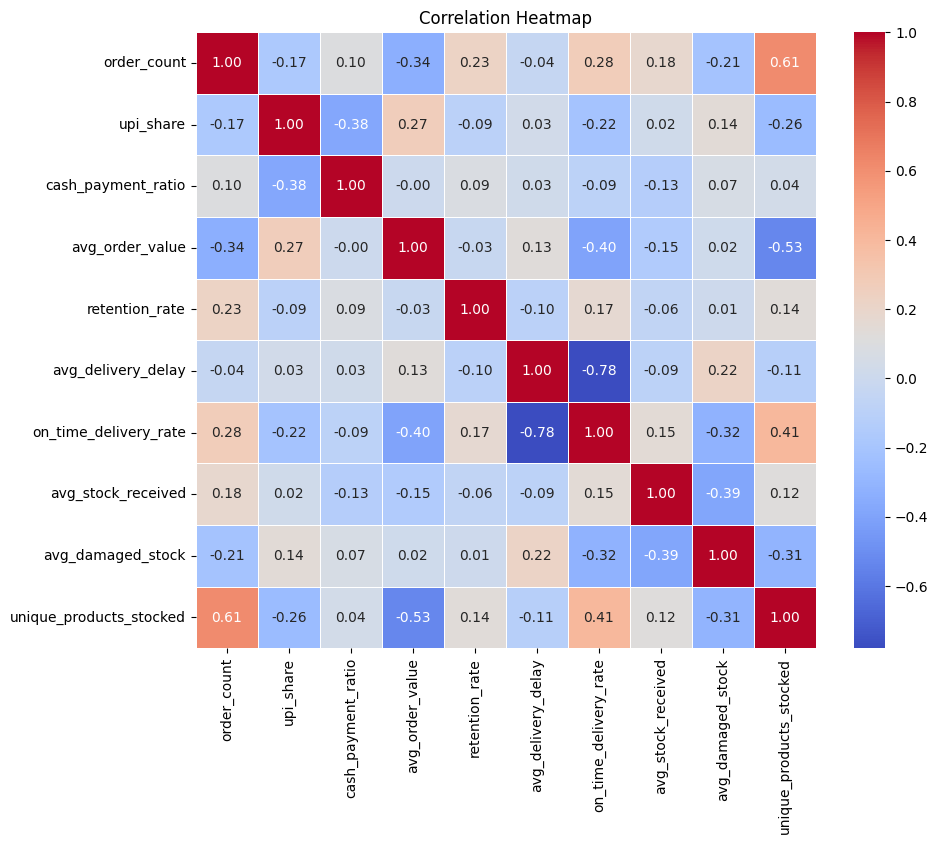

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(X1.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()



In [ ]:
X1 = X1.drop(columns=['avg_delivery_delay'])


In [ ]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Example: df is your DataFrame, with independent variables (X)
# Let's say you've already cleaned and selected your features

# Add a constant term for intercept
# X1 = add_constant(X1)
X1_const = sm.add_constant(X1)
# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X1.columns
vif_data["VIF"] = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]

print(vif_data)


                   Feature          VIF
0              order_count    52.135611
1                upi_share    20.972492
2       cash_payment_ratio    32.271737
3          avg_order_value   143.314512
4           retention_rate     2.557080
5       avg_delivery_delay    22.973759
6    on_time_delivery_rate   113.664262
7       avg_stock_received   875.541230
8        avg_damaged_stock   457.018345
9  unique_products_stocked  1018.732664


In [ ]:
#################################
  #############################
    #########################
      #####################
        #################
#FEATURE IMPORTANCE(USING RFE AND LASSO)
#RESIDUAL ANALYSIS:TO SEE THE PERFORMANCE OF OUR MODEL (PRESS RESIDUAL)
#PCA TECHNEQUE USE

In [ ]:
X1.head(5)

,order_count,upi_share,cash_payment_ratio,avg_order_value,retention_rate,on_time_delivery_rate,avg_stock_received,avg_damaged_stock,unique_products_stocked
0,29,0.172414,0.206897,2092.218276,0.000000,0.413793,2.000000,1.021739,221
1,52,0.173077,0.269231,2340.950000,0.068966,0.365385,1.820912,1.105673,266
2,54,0.203704,0.314815,2309.269815,0.000000,0.407407,1.873884,1.046875,264
3,60,0.250000,0.266667,2413.339667,0.000000,0.466667,2.068508,0.983425,265
4,63,0.174603,0.333333,2075.700794,0.016667,0.396825,1.968254,1.037037,267


In [ ]:
y1.head(5)

,weekly_revenue
0,60674.33
1,121729.40
2,124700.57
3,144800.38
4,130769.15


In [ ]:
#RFE: RFE (Recursive Feature Elimination) is a feature selection technique that
#recursively removes the least important features to find the
#best subset of features for your model.
#here we can find out the top k important features for our data
#here i choose k=5 and get top 5 important features or key influenced features
#for our data

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = X1_scaled
y = y1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
selector = RFE(estimator=model, n_features_to_select=5, step=1)
selector = selector.fit(X_train, y_train)

key_features = []

f_idx = np.where(selector.support_ == True)[0]
# Iterate through the original DataFrame's columns to get the feature names
for i, c in enumerate(X1.columns): # Use X1.columns instead of X.columns
    if i in f_idx:
        key_features.append(c)
print('Key Features:', key_features)

Key Features: ['order_count', 'avg_order_value', 'avg_delivery_delay', 'on_time_delivery_rate', 'unique_products_stocked']


In [ ]:
#Lasso creates sparsity meansthat Lasso regression sets some
#of the feature coefficients exactly to zero
#effectively removing those features from the model.
#it acually transform unimportant columns to zero,here we take
#the value of alpha(degree of sparcity) 65 and notice that it transforms all
#features to 0 except the column upi_share that means it is the most important
#feature out of all the features

[19497.17058622    -0.             0.          1682.76299922
     0.            -0.             0.             0.
    -0.             0.        ]


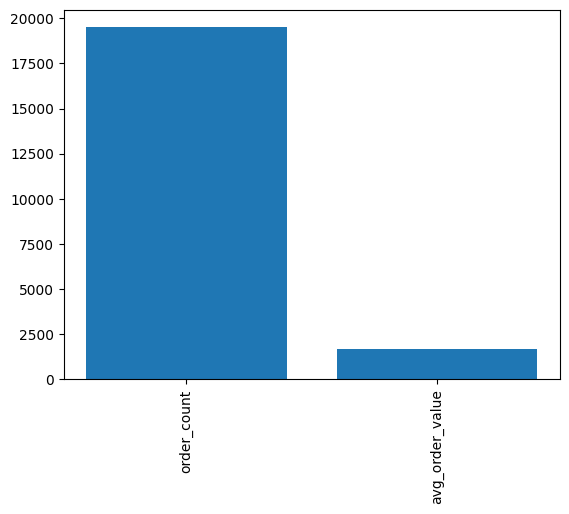

In [ ]:
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
import numpy as np

X = X1_scaled
y = y1

lasso = Lasso(alpha=4000)
lasso_coef = lasso.fit(X, y)
lasso_coef = lasso_coef.coef_
print(lasso_coef)

# Get the Lasso coefficients for only the selected key features
# lasso_coef_selected = lasso_coef[np.where(lasso.coef_ != 0)[0]] # This line was causing the issue
# lasso_coef_selected = lasso_coef[X.columns.get_indexer(key_features)] #Get lasso coeff for only features in key_features - This line raises error as X is numpy array
lasso_coef_selected = lasso_coef[np.isin(X1.columns, key_features)] # Use original DataFrame X1 to access columns
# Filter key_features to match selected features from Lasso
# key_features_selected = [feature for i, feature in enumerate(key_features) if lasso_coef[X.columns.get_loc(feature)] != 0] # Filter key features that have non-zero lasso coeff - This line uses X, which is incorrect
key_features_selected = [feature for i, feature in enumerate(key_features) if lasso_coef[np.where(X1.columns == feature)[0][0]] != 0] # Filter using X1 which is original dataframe


plt.bar(key_features_selected, lasso_coef_selected[np.where(lasso_coef[np.isin(X1.columns, key_features)] != 0)[0]])  # Use selected features and coefficients
plt.xticks(rotation=90)
plt.show()

In [ ]:
#Conditional indices are used to assess the sensitivity of the regression model
#to multicollinearity — that is, the degree to which
#the features are linearly dependent or correlated.
#Low Conditional Index (≤10)suggests that the feature set is well-conditioned
#we can see that for all features our conditional indices are less than 10
# that is our features are well_conditioned(no multicolinearity)



In [ ]:
import numpy as np

# Get eigenvalues of X'X (or of the correlation matrix)
eigenvalues = np.linalg.eigvals(np.corrcoef(X1, rowvar=False))
condition_indices = np.sqrt(max(eigenvalues) / eigenvalues)

for i, ci in enumerate(condition_indices):
    print(f"Component {i+1}: Condition Index = {ci:.2f}")

Component 1: Condition Index = 1.00
Component 2: Condition Index = 1.35
Component 3: Condition Index = 1.49
Component 4: Condition Index = 1.63
Component 5: Condition Index = 1.70
Component 6: Condition Index = 4.66
Component 7: Condition Index = 3.22
Component 8: Condition Index = 2.60
Component 9: Condition Index = 2.13
Component 10: Condition Index = 2.04


In [ ]:
#MSE tells you how well the model fits the data it was trained on.
#PRESS tells you how well the model performs on data it has never seen
#(via leave-one-out).
#we can see tha PRESS is close to n*MSE, so the model performs well

In [ ]:
X1_ = np.hstack([np.ones((X1.shape[0], 1)), X1])
beta = np.linalg.inv(X1_.T @ X1_) @ X1_.T @ y1
y_hat = X1_ @ beta
residuals = y1 - y_hat
H = X1_ @ np.linalg.inv(X1_.T @ X1_) @ X1_.T
leverage = np.diag(H)
press_residuals = residuals / (1 - leverage)
PRESS = np.sum(press_residuals ** 2)
print("PRESS:", PRESS)



PRESS: 6985647171.4047


In [ ]:
MSE: 57782808.61920805

In [ ]:
df.shape

(87, 13)

In [ ]:
57782808.61920805*87


5027104349.8711

In [ ]:
#here i use pca techneque but accuracy is not improved, it remsins same as before
#conclusion:features are already relatively uncorrelated and not redundant,
#then reducing dimensions with PCA does not provide much benefit


In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
X1 = pca.fit_transform(X1)
pca.explained_variance_ratio_

array([9.95997508e-01, 3.12819645e-03, 8.73916432e-04, 1.17655031e-07,
       1.15939109e-07, 7.02253949e-08, 4.19754895e-08, 2.56309970e-08,
       7.60349232e-09])

In [ ]:
X1_pca= df.drop(['retention_rate','avg_damaged_stock'], axis=1)

In [ ]:
scaler1 = StandardScaler()
X1_pca_scaled = scaler1.fit_transform(X1)

# Train-test split
X1_pca_train, X1_pca_test, y1_train, y1_test = train_test_split(X1_scaled, y1, test_size=0.2, random_state=42)

# Linear Regression model
model1 = LinearRegression()
model1.fit(X1_pca_train, y1_train)

# Predict and evaluate
y1_pred = model1.predict(X1_pca_test)
print("🔹 Model 1: Current Week Features → Revenue")
print("MSE:", mean_squared_error(y1_test, y1_pred))
print("R² Score:", r2_score(y1_test, y1_pred))

🔹 Model 1: Current Week Features → Revenue
MSE: 57782808.61920805
R² Score: 0.8594537204958755


In [ ]:
#random forest regressor
#___________________________________________________-


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Split data
# Use y1 instead of y, as y1 contains the target variable for the first model
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Fit Random Forest
rf_model = RandomForestRegressor(n_estimators=100,random_state=42)
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)

# Evaluate
print("Random Forest MSE:", mean_squared_error(y_test, y_pred_rf))
print("Random Forest R²:", r2_score(y_test, y_pred_rf))

Random Forest MSE: 75077089.25733706
Random Forest R²: 0.8173884962800132


In [ ]:
#xg boost regressor____________________________-


In [ ]:
from xgboost import XGBRegressor

# Fit XGBoost
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate
print("XGBoost MSE:", mean_squared_error(y_test, y_pred_xgb))
print("XGBoost R²:", r2_score(y_test, y_pred_xgb))


XGBoost MSE: 134547571.06461132
XGBoost R²: 0.6727372555725539


In [ ]:
#MLP BACK PROPAGATION
#____________________________

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# Assuming you have your data loaded in a pandas DataFrame called X1
# X1 = pd.read_csv('your_data.csv')  # Load your data

# Separate features and target (assuming the last column is the target)
# If not, adjust accordingly
X = X1.iloc[:, :-1].values  # All columns except last
y = X1.iloc[:, -1].values   # Last column as target

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the neural network architecture
model = Sequential()

# Input layer and first hidden layer
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))

# Second hidden layer
model.add(Dense(32, activation='relu'))

# Third hidden layer
model.add(Dense(16, activation='relu'))

# Output layer with linear activation
model.add(Dense(1, activation='linear'))

# Compile the model with Adam optimizer
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])

# Print model summary
model.summary()

# Train the model
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=98,
                    batch_size=32,
                    verbose=1)

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test MAE: {mae:.4f}")

# Make predictions
predictions = model.predict(X_test)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 64)             │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,329 (13.00 KB)

 Trainable params: 3,329 (13.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/98
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 144ms/step - loss: 17090318336.0000 - mae: 128472.9688 - val_loss: 14588649472.0000 - val_mae: 119069.3438
Epoch 2/98
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 17284120576.0000 - mae: 129122.6406 - val_loss: 14588620800.0000 - val_mae: 119069.2188
Epoch 3/98
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 17119555584.0000 - mae: 128498.4609 - val_loss: 14588594176.0000 - val_mae: 119069.1094
Epoch 4/98
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 17084880896.0000 - mae: 128294.1875 - val_loss: 14588566528.0000 - val_mae: 119069.0000
Epoch 5/98
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 17155145728.0000 - mae: 128332.2500 - val_loss: 14588539904.0000 - val_mae: 119068.8750
Epoch 6/98
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 17230098432.0000 - mae: 128979.9219 - val_loss: 14588510208.0000 - val_mae: 119068.7500
Epoch 7/98
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 17188308992.0000 - mae: 128745.6797 - val_loss: 14588480512.0000 - val_m

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Make predictions
y_pred = model.predict(X1_test)

# Calculate metrics
mae = mean_absolute_error(y1_test, y1_pred)
mse = mean_squared_error(y1_test, y1_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y1_test, y1_pred)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R²) Score: {r2:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Mean Absolute Error (MAE): 3142.5763
Mean Squared Error (MSE): 57782808.6192
Root Mean Squared Error (RMSE): 7601.5004
R-squared (R²) Score: 0.8595
